# Perform Factor Analysis on Airline Passenger Satisfaction Suevey

# Read Data

In [1]:
pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 816.9 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 36.2 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=d741dece269fd5afe9b771b9e20d9880aeb02b1529e0429aa35a222ca4525ae4
  Stored in directory: /root/.cache/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer


In [4]:
import pandas as pd

import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('passenger_data_train.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

We will use the following 14 variables for the factor analysis:

1. Inflight wifi service               
2. Departure/Arrival time convenient    
3. Ease of Online booking               
4. Gate location                        
5. Food and drink                       
6. Online boarding                      
7. Seat comfort                         
8. Inflight entertainment               
9. On-board service                     
10. Leg room service                     
11. Baggage handling                     
12. Checkin service                      
13. Inflight service                     
14. Cleanliness 

In [7]:
cols = ['Inflight wifi service',               
'Departure/Arrival time convenient',    
'Ease of Online booking',               
'Gate location',                        
'Food and drink',                       
'Online boarding',                      
'Seat comfort',                         
'Inflight entertainment',               
'On-board service',                     
'Leg room service',                     
'Baggage handling',                     
'Checkin service',                      
'Inflight service',                     
'Cleanliness'] 


In [8]:
cols

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [9]:
data = df[cols]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Inflight wifi service              103904 non-null  int64
 1   Departure/Arrival time convenient  103904 non-null  int64
 2   Ease of Online booking             103904 non-null  int64
 3   Gate location                      103904 non-null  int64
 4   Food and drink                     103904 non-null  int64
 5   Online boarding                    103904 non-null  int64
 6   Seat comfort                       103904 non-null  int64
 7   Inflight entertainment             103904 non-null  int64
 8   On-board service                   103904 non-null  int64
 9   Leg room service                   103904 non-null  int64
 10  Baggage handling                   103904 non-null  int64
 11  Checkin service                    103904 non-null  int64
 12  In

## Perform Factor Analysis

In [11]:
from factor_analyzer import FactorAnalyzer


In [12]:
x = data

fa = FactorAnalyzer()

fa.fit(x)


FactorAnalyzer(rotation_kwargs={})

In [13]:
x.shape

(103904, 14)

In [14]:
ev, v = fa.get_eigenvalues()
ev

array([3.80011677, 2.36198598, 2.16589224, 1.06327401, 0.95093123,
       0.7003355 , 0.53995637, 0.51465504, 0.46947475, 0.36866001,
       0.32840792, 0.29509562, 0.25317089, 0.18804368])

## Create a Scree Plot

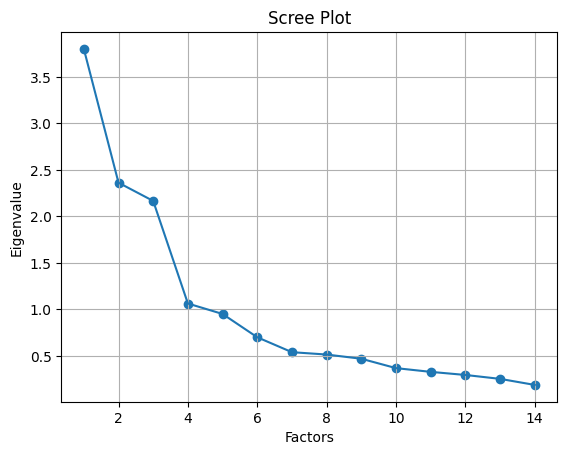

In [17]:
plt.scatter(range(1,x.shape[1]+1), ev)
plt.plot(range(1, x.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Factor Analysis with 3 factors

In [18]:
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(x)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [19]:
factor_df = pd.DataFrame(fa.loadings_, index=cols, columns=['Factor-1', 'Factor-2', 'Factor-3'])
factor_df

,Factor-1,Factor-2,Factor-3
Inflight wifi service,0.168270,0.128271,0.758091
Departure/Arrival time convenient,-0.029508,0.059681,0.501384
Ease of Online booking,0.030231,0.020914,0.932775
Gate location,-0.033828,-0.032311,0.504044
Food and drink,0.752639,0.010946,0.006167
Online boarding,0.395453,0.113811,0.359065
Seat comfort,0.789990,0.081463,0.027258
Inflight entertainment,0.745693,0.466750,0.012034
On-board service,0.093881,0.701154,0.029009
Leg room service,0.074455,0.481442,0.080650


The higher a factor loading, the more important a variable is for the said factor.


Here are the **3 factors** created, the variables they contain and their possible **“interpretability”**:

### **Comfort:** Food and Drink, Seat comfort, Inflight entertainment, Cleanliness
### **Service:** Onboard service, Baggage Handling, Inflight Service
### **Convenience:** In flight Wifi, Departure/Arrival time convenience, Online Booking, Gate Location.

## Check the coherence of the variables considered to form a Factor

In [20]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=24e5309334f43260210f6d7b7044c0cc9c1e10f4c6d8207e1981bbd3fff933db
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [21]:
import pingouin as pg

In [22]:
factor1 =  df[['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']]
factor2 = df[['On-board service', 'Baggage handling', 'Inflight service']]
factor3 = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']]


In [23]:
factor1_alpha = pg.cronbach_alpha(factor1)[0]
factor2_alpha = pg.cronbach_alpha(factor2)[0]
factor3_alpha = pg.cronbach_alpha(factor3)[0]

In [24]:
print(factor1_alpha)
print(factor2_alpha)
print(factor3_alpha)

0.8762877916624099
0.7942916933090214
0.7679754211110683


## Dimension Reduction

In [25]:
new_variables = fa.fit_transform(x)

In [27]:
new_variables.shape

(103904, 3)